## 1. DATA PREPROCESSING

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
dataset = pd.read_csv("features_30_sec.csv")
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
#Checking for null values
dataset = pd.read_csv("features_30_sec.csv")
null_values = dataset.isnull().sum()

print("Null values in each column:")
print(null_values)


Null values in each column:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean     

Class distribution:
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Class proportions:
blues        0.1
classical    0.1
country      0.1
disco        0.1
hiphop       0.1
jazz         0.1
metal        0.1
pop          0.1
reggae       0.1
rock         0.1
Name: label, dtype: float64


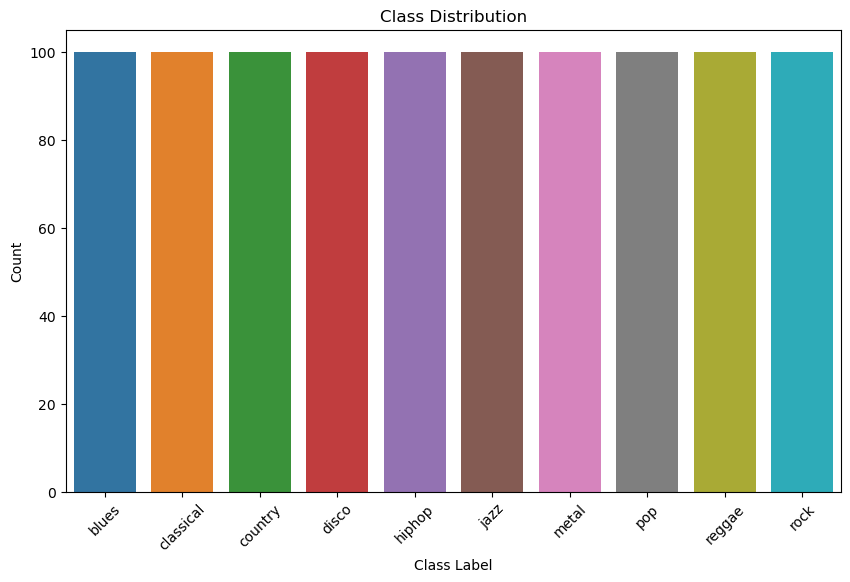

In [4]:
## Checking for Class Imbalance

import pandas as pd

dataset = pd.read_csv("features_30_sec.csv")
class_counts = dataset['label'].value_counts()
print("Class distribution:")
print(class_counts)
class_proportions = dataset['label'].value_counts(normalize=True)
print("\nClass proportions:")
print(class_proportions)

plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='label', order=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


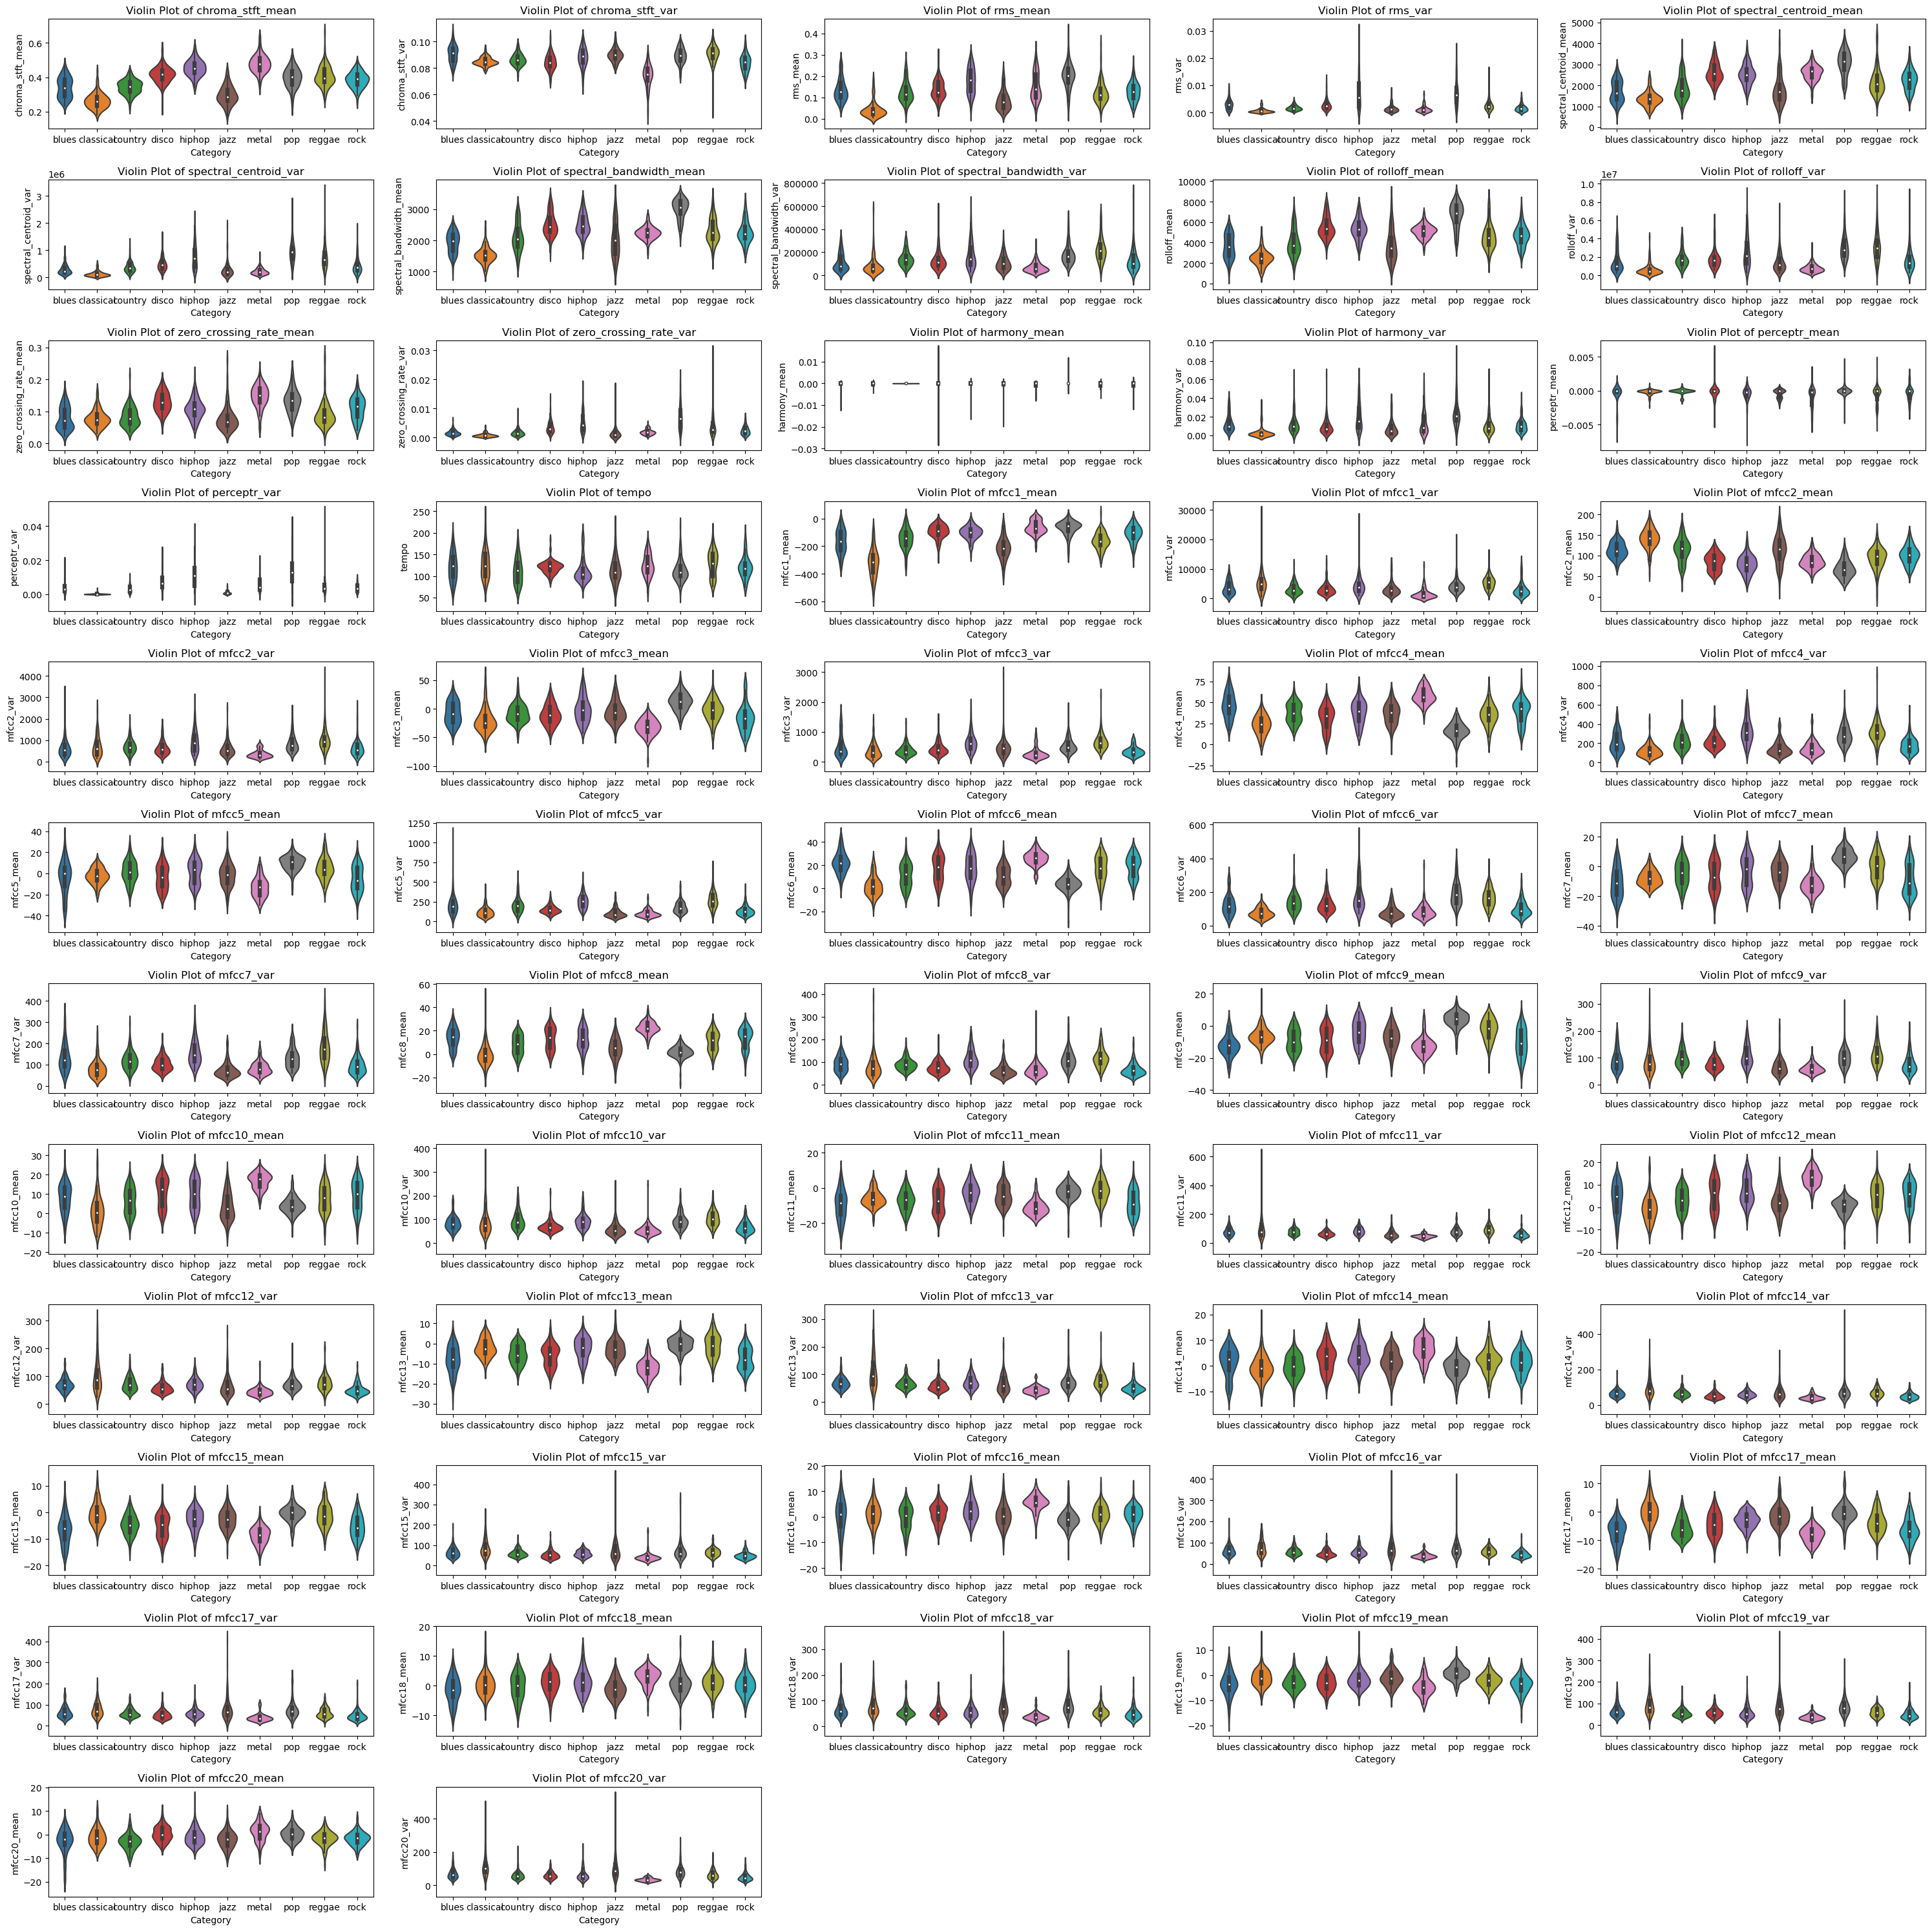

In [5]:
## Violin Plot for all the variables

audio_features = [
    'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
    'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
    'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
    'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var',
    'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var',
    'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var',
    'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
    'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
    'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
    'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
    'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
    'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
    'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
    'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'
]

plt.figure(figsize=(30, 30))
for i, feature in enumerate(audio_features):
    plt.subplot(12, 5, i+1)
    sns.violinplot(y=dataset[feature], x=dataset['label'])
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel('Category')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## 2.FEAUTRE SELECTION

In [6]:
## Variable Inflation factor

audio_features = [
    'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
    'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
    'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
    'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var',
    'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var',
    'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var',
    'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
    'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
    'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
    'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
    'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
    'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
    'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
    'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'
]

dataset = dataset.dropna()

if 'label' in dataset.columns:
    dataset = dataset.drop(['label'], axis=1)

X = sm.add_constant(dataset[audio_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print(vif_data)


                    Feature          VIF
0                     const  4277.864743
1    spectral_centroid_mean   314.461109
2              rolloff_mean   170.906468
3   spectral_bandwidth_mean   101.298690
4                  rms_mean    73.447061
5   zero_crossing_rate_mean    43.365612
6     spectral_centroid_var    36.749676
7                mfcc1_mean    31.639561
8                mfcc2_mean    27.193477
9               rolloff_var    22.401203
10              harmony_var    20.479794
11   zero_crossing_rate_var    14.105133
12             perceptr_var    12.732417
13         chroma_stft_mean     8.014476
14   spectral_bandwidth_var     7.900733
15               mfcc3_mean     6.878778
16               mfcc8_mean     6.833757
17               mfcc19_var     6.368915
18               mfcc17_var     5.761178
19               mfcc6_mean     5.700599
20               mfcc15_var     5.541728
21                  rms_var     5.513329
22               mfcc18_var     5.398445
23              

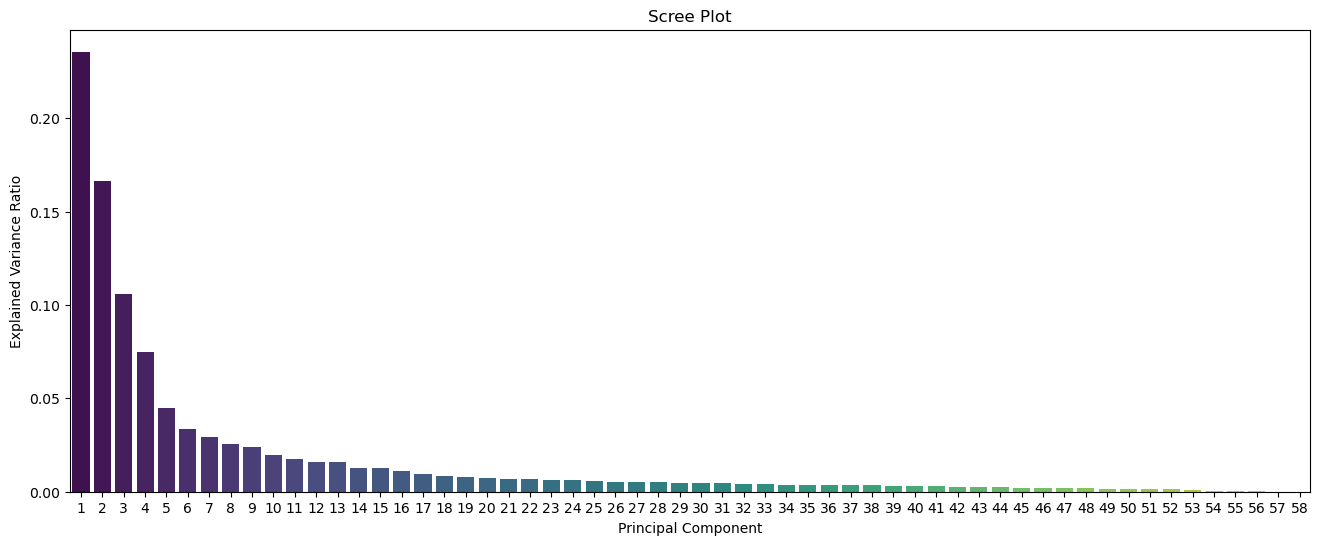

In [7]:
## Principle Component Analysis

dataset = pd.read_csv("features_30_sec.csv")
dataset = dataset.dropna()

X = dataset.drop(['filename', 'label'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X_scaled)

principal_df = pd.DataFrame(data=principal_components, 
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(16, 6))
sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, palette="viridis")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [8]:
# Components that explain 95% of variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

[0.23568344 0.40222834 0.50788348 0.58259243 0.62760655 0.66138366
 0.69082268 0.7164389  0.74017083 0.7598046  0.77753339 0.79355314
 0.80933499 0.82224688 0.83468939 0.84577868 0.85531617 0.86385671
 0.87179586 0.87906839 0.8860756  0.89271087 0.89918686 0.90535025
 0.91111654 0.91649712 0.9216441  0.92670448 0.93162448 0.93636074
 0.94088039 0.94513529 0.94920586 0.95307003 0.95679446 0.96039477
 0.96381038 0.96717504 0.97027964 0.97328312 0.97617621 0.97888829
 0.98141816 0.98372509 0.98588272 0.98794849 0.98995313 0.99180305
 0.99352126 0.99504963 0.99652717 0.99781923 0.9987277  0.99933385
 0.99973087 0.99986864 0.99996235 1.        ]
Number of components explaining 95% variance: 34


## 3. MACHINE LEARNING MODELS

# RANDOM FOREST

In [9]:
dataset = pd.read_csv("features_30_sec.csv")

all_features = dataset.columns[1:-1]  

dataset = dataset.dropna()

X = dataset[all_features]
y = dataset['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("RF score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

RF score: 0.755

Classification Report:
               precision    recall  f1-score   support

       blues       0.63      0.85      0.72        20
   classical       1.00      1.00      1.00        13
     country       0.76      0.59      0.67        27
       disco       0.83      0.71      0.77        21
      hiphop       0.59      0.87      0.70        15
        jazz       0.95      0.91      0.93        22
       metal       0.86      0.96      0.91        25
         pop       0.75      0.69      0.72        13
      reggae       0.70      0.61      0.65        23
        rock       0.56      0.48      0.51        21

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.76      0.76      0.75       200



## CNN

In [11]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train_categorical, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_classes))



C:\Users\thila\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.93      1.00      0.96        13
           2       0.77      0.63      0.69        27
           3       0.53      0.48      0.50        21
           4       0.63      0.80      0.71        15
           5       0.90      0.82      0.86        22
           6       0.91      0.84      0.87        25
           7       0.59      0.77      0.67        13
           8       0.69      0.48      0.56        23
           9       0.64      0.67      0.65        21

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.73      0.72      0.72       200



## K - Nearest Neighbour

In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors=27, p=2, metric='euclidean')
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

knn_score = accuracy_score(y_test, y_pred)
print('Accuracy:', knn_score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

       blues       0.53      0.40      0.46        20
   classical       0.80      0.92      0.86        13
     country       0.49      0.74      0.59        27
       disco       0.48      0.62      0.54        21
      hiphop       0.73      0.53      0.62        15
        jazz       0.92      0.55      0.69        22
       metal       0.77      0.80      0.78        25
         pop       0.48      0.77      0.59        13
      reggae       0.46      0.26      0.33        23
        rock       0.33      0.29      0.31        21

    accuracy                           0.57       200
   macro avg       0.60      0.59      0.58       200
weighted avg       0.59      0.57      0.57       200



## Support Vector Machine

In [13]:
clf = SVC(kernel='rbf', C=3.0, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print("Accuracy:", score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

       blues       0.77      0.85      0.81        20
   classical       0.86      0.92      0.89        13
     country       0.83      0.74      0.78        27
       disco       0.68      0.71      0.70        21
      hiphop       0.59      0.87      0.70        15
        jazz       0.90      0.86      0.88        22
       metal       0.92      0.92      0.92        25
         pop       0.62      0.62      0.62        13
      reggae       0.60      0.39      0.47        23
        rock       0.59      0.62      0.60        21

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



## XG Boost

In [14]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_encoded)))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       1.00      1.00      1.00        13
           2       0.73      0.59      0.65        27
           3       0.73      0.76      0.74        21
           4       0.72      0.87      0.79        15
           5       1.00      0.91      0.95        22
           6       0.96      0.92      0.94        25
           7       0.71      0.77      0.74        13
           8       0.71      0.65      0.68        23
           9       0.61      0.52      0.56        21

    accuracy                           0.78       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.78      0.78      0.77       200



## Results and Interpretation

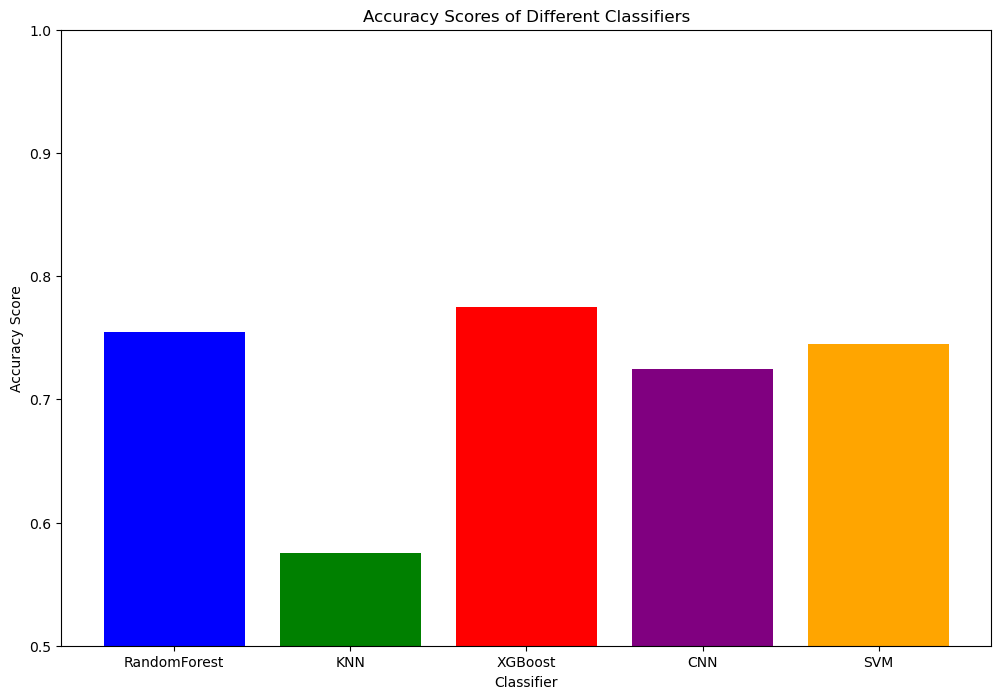

In [15]:
import matplotlib.pyplot as plt

accuracies = {
    'RandomForest': 0.755,
    'KNN': 0.575,
    'XGBoost': 0.775,
    'CNN': 0.725,
    'SVM': 0.745
}

plt.figure(figsize=(12, 8))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.ylim(0.5, 1)  
plt.show()


## 4. Model Improvement - Hyperparameter Tuning 

## 5.SHAP VALUES